# Exploratory Data Analysis:


# Adult.csv

# Introduction :
The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US Census database. 


## Data Description :

The Dataset 
The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:
- age
- workclass
- fnlwgt: final weight. 
- education
- education-num
- marital-status: marital status of an individual.  
- occupation
- relationship
- race
- capital-gain
- capital-loss 
- hours-per-week 
- native-country: country of origin for an individual 
- Income: whether or not an individual makes more than $50,000 annually. ○ <=50k, >50k

## Objective:
- To import the data and extract basic information
- To perform univariate and bivariate analysis and take down observations
- Find and treat the outliers and missing values in each column
- Perform feature transformation
- Build various Machine Learning models considering ‘income’ as target variable.
- Create a table to compare the performance of each of the ML Model.
- To test the data based on research questions
- Make conclusions based on observations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats

In [3]:
from scipy.stats import norm

In [4]:
from sklearn import preprocessing

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('adult.csv')

In [7]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
df.shape

(48842, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [18]:
df.mean()

age                    38.643585
fnlwgt             189664.134597
educational-num        10.078089
capital-gain         1079.067626
capital-loss           87.502314
hours-per-week         40.422382
dtype: float64

In [15]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [21]:
df.groupby(['occupation']).count()

,age,workclass,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
occupation,,,,,,,,,,,,,,
?,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809
Adm-clerical,5611,5611,5611,5611,5611,5611,5611,5611,5611,5611,5611,5611,5611,5611
Armed-Forces,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Craft-repair,6112,6112,6112,6112,6112,6112,6112,6112,6112,6112,6112,6112,6112,6112
Exec-managerial,6086,6086,6086,6086,6086,6086,6086,6086,6086,6086,6086,6086,6086,6086
Farming-fishing,1490,1490,1490,1490,1490,1490,1490,1490,1490,1490,1490,1490,1490,1490
Handlers-cleaners,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072,2072
Machine-op-inspct,3022,3022,3022,3022,3022,3022,3022,3022,3022,3022,3022,3022,3022,3022
Other-service,4923,4923,4923,4923,4923,4923,4923,4923,4923,4923,4923,4923,4923,4923


In [22]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [23]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [24]:
df['occupation'].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [25]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

# Univariate Analysis:

<AxesSubplot:xlabel='gender', ylabel='count'>

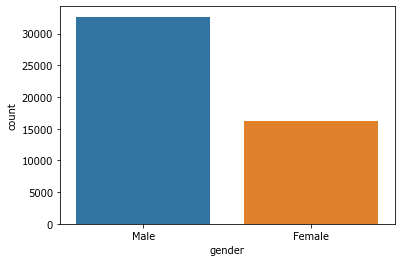

In [34]:
# Gender
sns.countplot(x='gender', data=df)

There are 2 unique categories in gender. frequency of male is higher than female.


<AxesSubplot:xlabel='income', ylabel='count'>

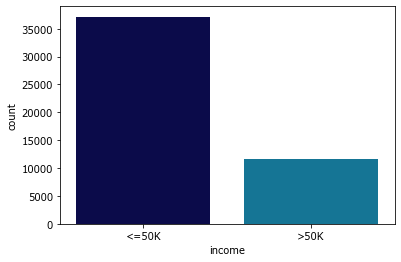

In [35]:
# Income
sns.countplot(x='income',data=df,palette='ocean')

- In income there is 2 groups 
     - group1:who earns less than or equal to 50k and 
     - group2 : who earns greater than 50k .
       - Group 1 has more ppl than group 2.


<AxesSubplot:xlabel='count', ylabel='occupation'>

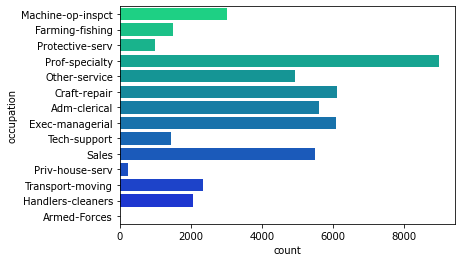

In [38]:
# Occupation
sns.countplot(y='occupation', data=df, palette='winter_r')

In occupation Prof-specialty has the maximum count. Armed-Forces has minimum count .


<function matplotlib.pyplot.show(close=None, block=None)>

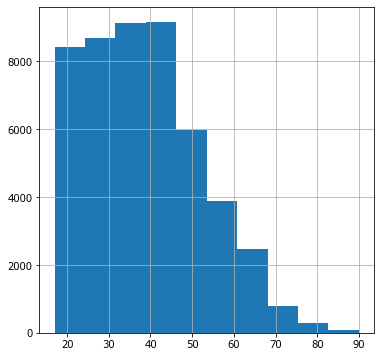

In [57]:
# Age
df['age'].hist(figsize = (6,6))
plt.show

 By observation age attribute is right-skewed and not symetric. min age is between 83-90. Max age is between 41-46.


<AxesSubplot:xlabel='count', ylabel='workclass'>

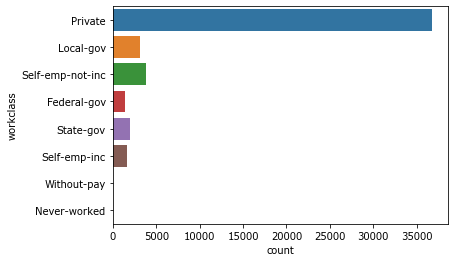

In [47]:
# Workclass
sns.countplot(y='workclass', data=df)

- In workclass most of them belong to private workclass. 
    - without-play and never-play workclass has min count.

<function matplotlib.pyplot.show(close=None, block=None)>

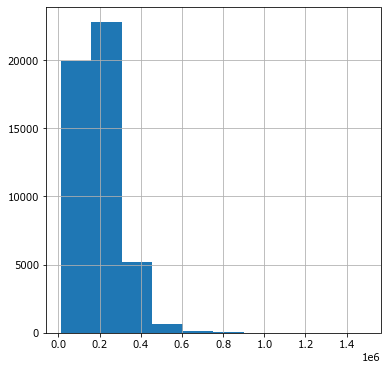

In [58]:
#Final weight
df['fnlwgt'].hist(figsize = (6,6))
plt.show

- Final weight is right skewed.

<AxesSubplot:xlabel='count', ylabel='education'>

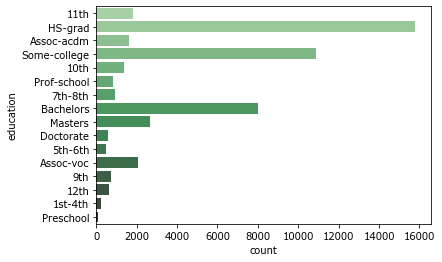

In [51]:
#Education
sns.countplot(y='education', data=df, palette='Greens_d')

 In education attribute HS-grad has max count and Preschool has least count.


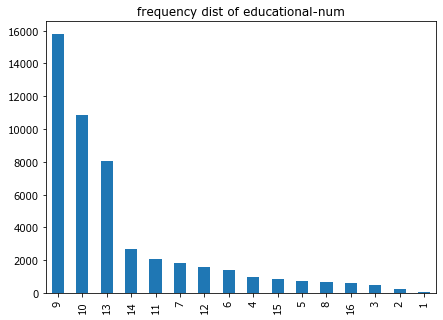

In [45]:
#Education
plt.subplots(figsize=(7,5))
df['educational-num'].value_counts().plot.bar(title = 'frequency dist of educational-num')
plt.show()

 In educational-num attribute 9 has more count than 1.


<AxesSubplot:xlabel='count', ylabel='marital-status'>

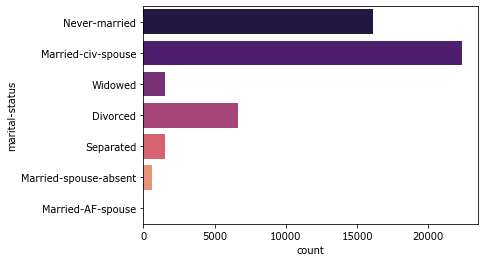

In [54]:
#Marital-status
sns.countplot(y='marital-status', data=df, palette='magma')

 Married-civ-spouse has maximum number of counts. Married-AF-spouse has minimum number of counts.


<AxesSubplot:xlabel='count', ylabel='occupation'>

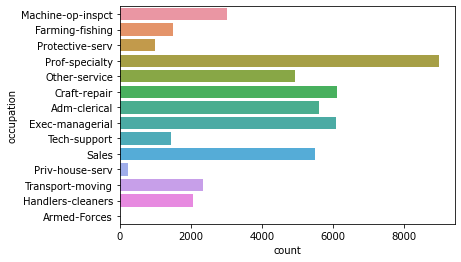

In [56]:
#Occupation
sns.countplot(y='occupation', data=df)

Prof-specialty has the maximum count. Armed-Forces has minimum samples in the occupation attribute.


<AxesSubplot:xlabel='count', ylabel='relationship'>

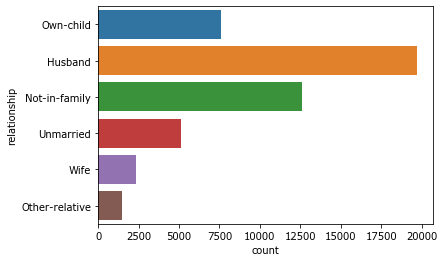

In [60]:
#Relationship
sns.countplot(y='relationship', data=df)

 Husband has maximum count among all.


<AxesSubplot:xlabel='count', ylabel='race'>

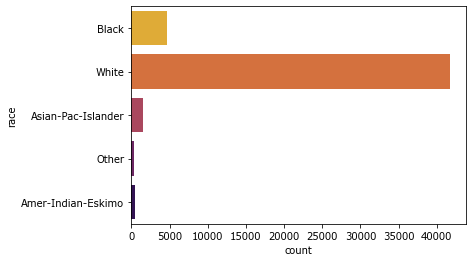

In [66]:
#Race
sns.countplot(y='race', data=df, palette='inferno_r')

white is maximun among all and black is second maximum.


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

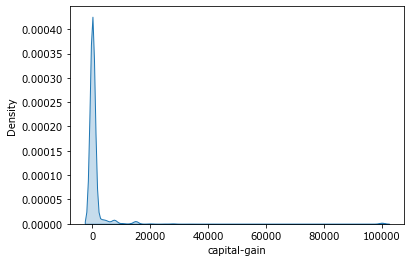

In [33]:
#Capital-gain
sns.kdeplot(df[ 'capital-gain'],shade=True)

capital-gain shows that either a person has no gain or has gain of very large amount (10,000 or 99,000).


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

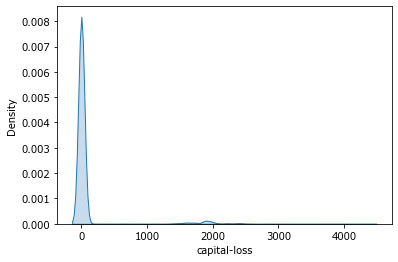

In [34]:
#Capital-loss
sns.kdeplot(df[ 'capital-loss'],shade=True)

This attribute is similar to the capital-gain i.e. most of the values are centered on 0.


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

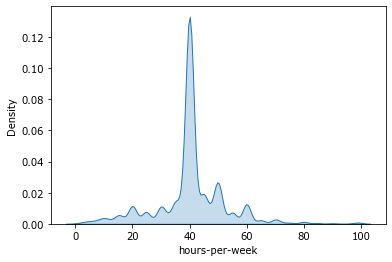

In [35]:
#Hours-per-week
sns.kdeplot(df['hours-per-week'],shade=True)

By observation,30-40 hrs people work per week. There are also few people who works 80-100 hours per week and some less than 20 which is unusual.


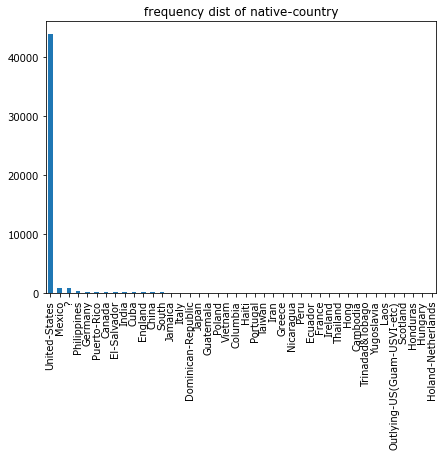

In [50]:
#Native-country
plt.subplots(figsize=(7,5))
df['native-country'].value_counts().plot.bar(title = 'frequency dist of native-country')
plt.show()

 Most of the ppl have US as native country.


# Observations:
- There are 2 unique categories in gender. frequency of male is higher than female.
- In income there is 2 groups 
     - group1:who earns less than or equal to 50k and 
     - group2 : who earns greater than 50k .
       - Group 1 has more ppl than group 2.
- In occupation Prof-specialty has the maximum count. Armed-Forces has minimum count .
- By observation age attribute is right-skewed and not symetric. min age is between 83-90. Max age is between 41-46.
- In workclass most of them belong to private workclass. 
    - without-play and never-play workclass has min count.
- Final weight is right skewed.
- In education attribute HS-grad has max count and Preschool has least count.
- In educational-num attribute 9 has more count than 1.
-  Married-civ-spouse has maximum number of counts. Married-AF-spouse has minimum number of counts.
- Prof-specialty has the maximum count. Armed-Forces has minimum samples in the occupation attribute.
- Husband has maximum count among all.
- white is maximun among all and black is second maximum.
- capital-gain shows that either a person has no gain or has gain of very large amount (10,000 or 99,000).
- This attribute is similar to the capital-gain i.e. most of the values are centered on 0.
-  By observation,30-40 hrs people work per week. There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
- Most of the ppl have US as native country.


# Bivariate Analysis:

### Relation between Numerical values:

<AxesSubplot:xlabel='age', ylabel='income'>

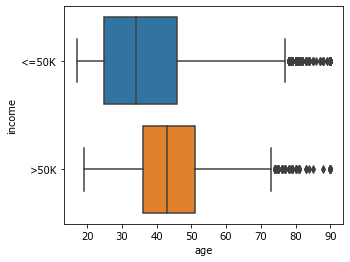

In [69]:
# plot age vs income
plt.figure(figsize=(5,4))
sns.boxplot(x='age',y='income', data=df)

- Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).


<AxesSubplot:xlabel='income', ylabel='capital-gain'>

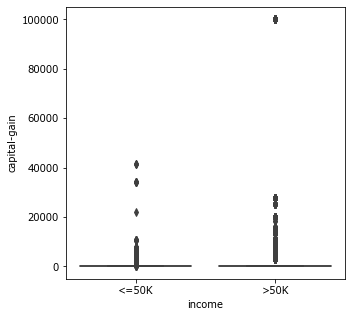

In [85]:
#plot income vs capital-gain
plt.figure(figsize=(5,5))
sns.boxplot(x='income', y='capital-gain', data=df)

Most of the capital gains value is accumulated at 0-20k for both the income group .


<AxesSubplot:xlabel='income', ylabel='capital-loss'>

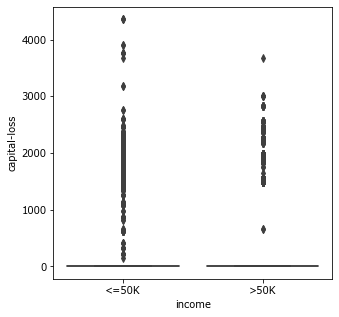

In [82]:
#plot income vs capital-loss
plt.figure(figsize=(5,5))
sns.boxplot(x='income', y='capital-loss', data=df)

This boxplot shows capital loss of 0-2800 for group 1 of income and 1500-3000 for group 2 of income.


<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

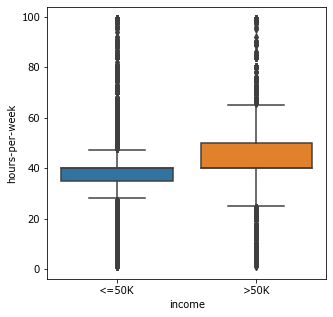

In [108]:
#plot income vs hours-per-week 
plt.figure(figsize=(5,5))
sns.boxplot(x='income', y='hours-per-week', data=df)

People with income >50k work almost 10 hours extra than people with <=50k.


### Relation between Categorical Values and Numerical Values:

<AxesSubplot:xlabel='gender', ylabel='age'>

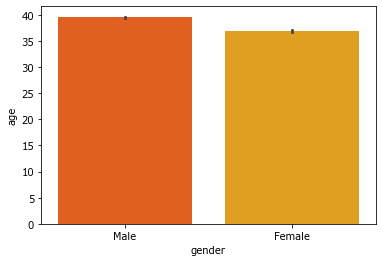

In [31]:
#plost gender vs age
sns.barplot(x = 'gender', y='age', data=df, palette = 'autumn')

In barplot of age and gender , the count of age is almost equal for both genders.


<AxesSubplot:xlabel='count', ylabel='workclass'>

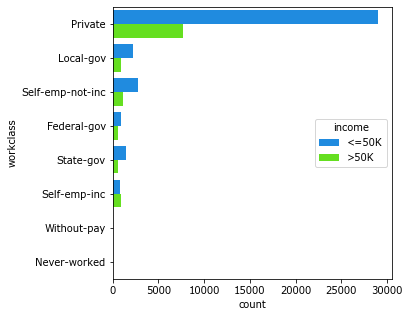

In [81]:
#plot workclass vs income
plt.figure(figsize=(5,5))
sns.countplot(y='workclass', hue='income', data=df, palette='gist_rainbow_r')

In count plot of work class and Income private work class is more with both income groups.


<AxesSubplot:xlabel='count', ylabel='education'>

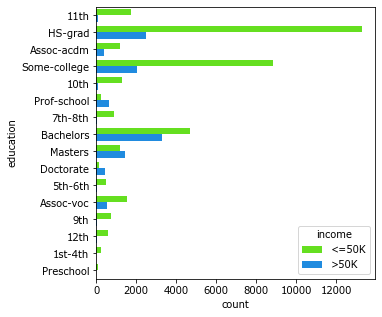

In [93]:
# plot educcation vs income
plt.figure(figsize=(5,5))
sns.countplot(y='education', hue='income', data=df, palette='gist_rainbow')

This data mostly consist of people who has education as HS-grad.


<AxesSubplot:xlabel='count', ylabel='relationship'>

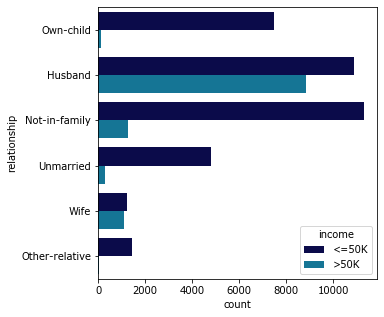

In [88]:
# plotting relationship vs income
plt.figure(figsize=(5,5))
sns.countplot(y='relationship',hue='income', data=df, palette='ocean')

Mostly a person with relation as husband in a family has most count of people with more then 50k income.


<AxesSubplot:xlabel='count', ylabel='marital-status'>

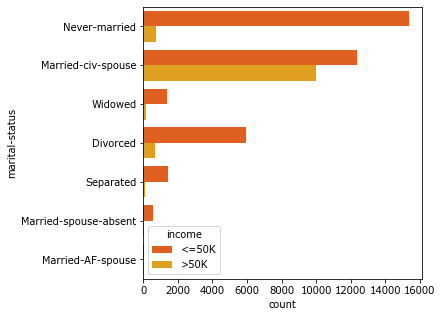

In [99]:
#plot marital-status vs income
plt.figure(figsize=(5,5))
sns.countplot(y='marital-status', hue='income', data=df, palette='autumn')

The people with marital status as Married-civ-spouce has highest people with income more then 50k.


<AxesSubplot:xlabel='count', ylabel='occupation'>

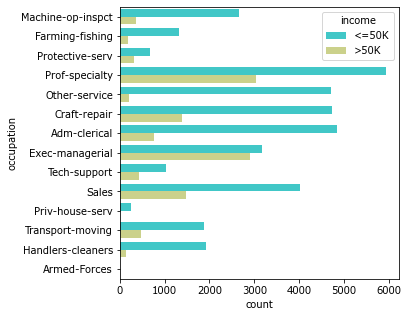

In [92]:
# plot occupation vs income
plt.figure(figsize=(5,5))
sns.countplot(y='occupation',hue='income', data=df, palette='rainbow')

 Prof-speciality have more people with both income groups.


<AxesSubplot:xlabel='count', ylabel='relationship'>

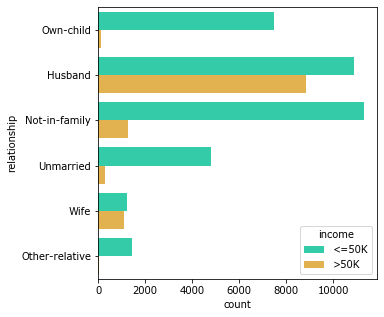

In [97]:
# plot relationship vs income
plt.figure(figsize=(5,5))
sns.countplot(y='relationship', hue='income', data=df, palette='turbo')

Husbands have more people with both income groups.


<AxesSubplot:xlabel='count', ylabel='race'>

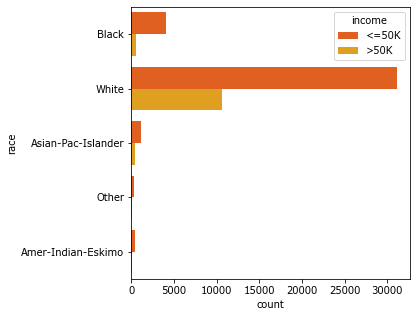

In [102]:
#plot race vs income
plt.figure(figsize=(5,5))
sns.countplot(y='race', hue='income', data=df, palette='autumn')

White people have more persons in both income groups.


<AxesSubplot:xlabel='count', ylabel='native-country'>

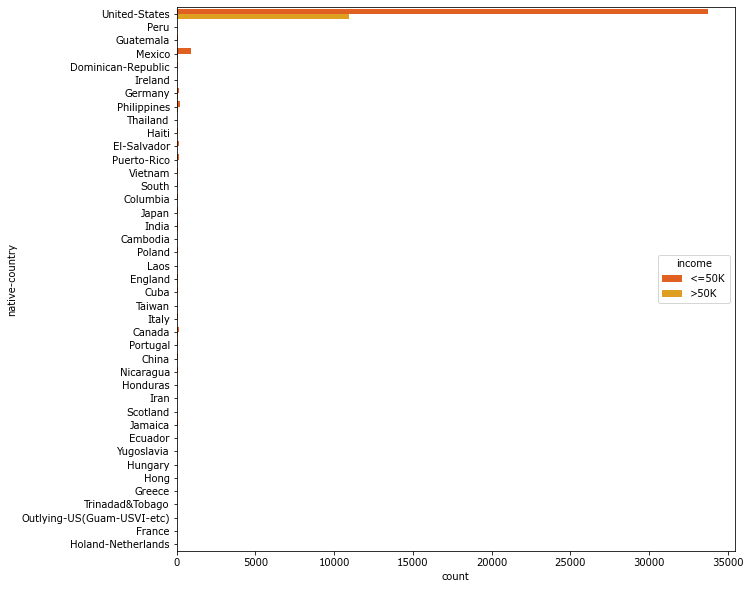

In [107]:
# plot native-country vs income
plt.figure(figsize=(10,10))
sns.countplot(y='native-country', hue='income', data=df, palette='autumn')

US has most people with income of <=50k more.


#### Correlation:

<AxesSubplot:>

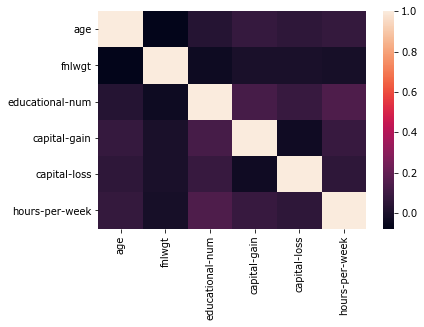

In [67]:
sns.heatmap(df.corr())

## Observations:
- Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
- Most of the capital gains value is accumulated at 0-20k for both the income group .
- This boxplot shows capital loss of 0-2800 for group 1 of income and 1500-3000 for group 2 of income.
- People with income >50k work almost 10 hours extra than people with <=50k.

- In barplot of age and gender , the count of age is almost equal for both genders.
- In count plot of work class and Income private work class is more with both income groups.
- This data mostly consist of people who has education as HS-grad.
- Mostly a person with relation as husband in a family has most count of people with more then 50k income.
- The people with marital status as Married-civ-spouce has highest people with income more then 50k.
- Prof-speciality have more people with both income groups.
- Husbands have more people with both income groups.
- White people have more persons in both income groups.
- US has most people with income of <=50k more.


# Missing value treatment:

The data set contains alot of missing values . We will find them in each attribute and treat them .

### Age:

In [8]:
#To see how many null values are there in the data
df['age'].isnull().sum()

0

In [9]:
# Filling null values with median
df['age']=df['age'].fillna(df['age'].median())

In [10]:
df['age'].isnull().sum()

0

### Workclass:

In [11]:
#To see how many null values are there in the data
df['workclass'].isnull().sum()

0

In [12]:
#It has missing values in the form of '?' so we will replace it with nan
df['workclass']=df['workclass'].replace('?',np.nan)

In [13]:
##Again seeing how many null values are there in the data
df['workclass'].isnull().sum()

2799

In [14]:
# since it is categorical value we will find its mode
mode=df['workclass'].mode()[0]

In [15]:
#Filling missing value with mode

df['workclass'].replace(np.nan,'Private',inplace=True)

In [16]:
##Again seeing how many null values are there in the data
df['workclass'].isnull().sum()

0

### Final weight:

In [19]:
#Filling missing value with median

df['fnlwgt'].fillna(df['fnlwgt'].median(),inplace=True)

### Education:

In [20]:
#To see how many null values are there in the data
df['education'].isnull().sum()

0

### Marital- Status:

In [22]:
#To see how many null values are there in the data

df['marital-status'].isnull().sum()

0

### Occupation:

In [23]:
#Imputing the missing values with mode

df['occupation'].replace('?','Prof-specialty',inplace=True)

### Race:

In [24]:
#To see how many null values are there in the data

df['race'].isnull().sum()

0

### Gender:

In [25]:
#To see how many null values are there in the data
df['gender'].isnull().sum()

0

### Capital-gain:

In [28]:
# The value 99999 appears to be nan let's replace it with median of the data as it is very different from the data values.

df['capital-gain'].replace(99999,df['capital-gain'].median(0),inplace=True)

In [27]:
#To see how many null values are there in the data

df['capital-gain'].isnull().sum()

0

### Hours-per-week:

In [29]:
#To see how many null values are there in the data

df['hours-per-week'].isnull().sum()

0

In [31]:
#Imputing the missing values with median

df['hours-per-week']=df['hours-per-week'].fillna(df['hours-per-week'].median())

In [32]:
#Again checking how many null values are there in the data

df['hours-per-week'].isnull().sum()

0

### Native-country:

In [33]:
# Since it is a categorical value . Finding mode value from the data

df['native-country'].mode()[0]

'United-States'

In [34]:
#Imputing null values with mode

df['native-country'].replace("?",'United-States',inplace=True)


In [36]:
#again checking how many null values are there in the data

df['native-country'].isnull().sum()

0

### Income:

In [35]:
#To see how many null values are there in the data

df['income'].isnull().sum()

0

# Outlier Treatment:

The data set contains alot of Outliers . We will find them in each attribute and treat them 

In [37]:
# Using IQR to find the outlier information
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    print('lower limit:',Lower_tail)
    print('upper limit:',Upper_tail)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)



### Age:

<AxesSubplot:xlabel='age'>

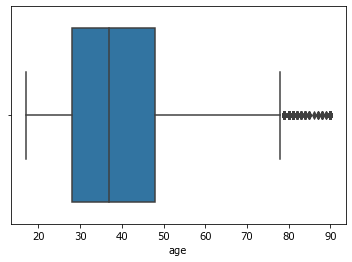

In [38]:
#Box Plot before outlier removing
sns.boxplot(df['age'])

In [39]:
# Finding outliers in the data
age_outliers=iqr_outliers(df['age'])

lower limit: -2.0
upper limit: 78.0
Outliers: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


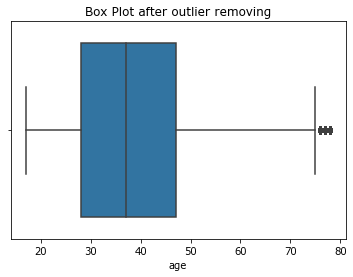

In [40]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'age')
sns.boxplot(df['age'])
plt.title("Box Plot after outlier removing")
plt.show()

### Final weight:

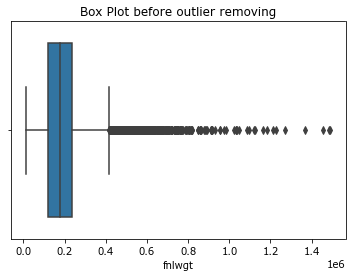

In [41]:
#Box Plot before outlier removing
sns.boxplot(df['fnlwgt'])
plt.title("Box Plot before outlier removing")
plt.show()

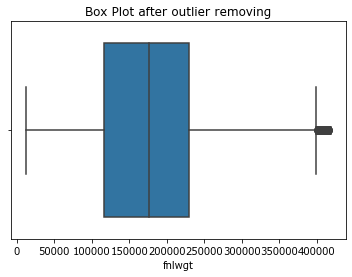

In [42]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'fnlwgt')
sns.boxplot(df['fnlwgt'])
plt.title("Box Plot after outlier removing")
plt.show()

### Educational-num:

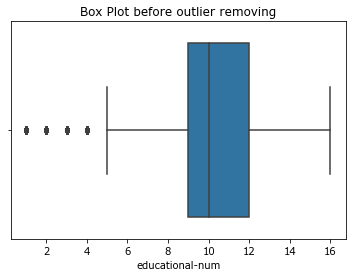

In [43]:
sns.boxplot(df['educational-num'])
plt.title("Box Plot before outlier removing")
plt.show()

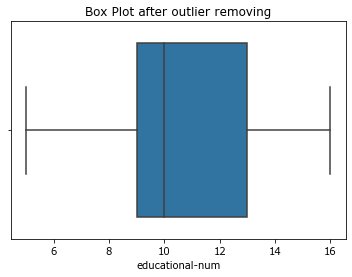

In [44]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'educational-num')
sns.boxplot(df['educational-num'])
plt.title("Box Plot after outlier removing")
plt.show()

### Hours-per-week:

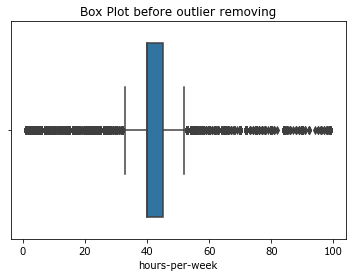

In [16]:
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot before outlier removing")
plt.show()

In [17]:
age_outliers=iqr_outliers(df['hours-per-week'])

lower limit: 32.5
upper limit: 52.5
Outliers: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81, 30, 30, 32, 30, 20, 20, 54, 60, 32, 18, 20, 24, 60, 54, 20, 30, 10, 56, 10, 25, 10, 18, 2

In [18]:
#Removing the outliers

df['hours-per-week']=df[(df['hours-per-week']> 32.5) & (df['hours-per-week']<52.5)]

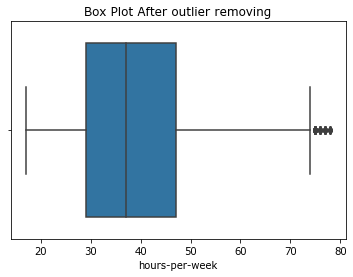

In [19]:
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot After outlier removing")
plt.show()

# One hot encoding:

# Encoding categorical Values:

In [45]:
#workclass
df['workclass'].replace(['Private','Self-emp-not-inc','Local-gov',np.nan,'State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked'],
                          ['Private','inc','gov',np.nan,'gov','inc','gov','Without-pay','Never-worked'],inplace=True)
#marital-status
df['marital-status'].replace(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],['not-married','married','not-married','not-married','not-married','married','married'],inplace=True)
#gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})


In [46]:
#mapping the data into numerical data using map function
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [47]:
df['income'].value_counts()

0    34259
1    11247
Name: income, dtype: int64

In [48]:
#Dropping capital-gain and capital-loss

df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [49]:
#Dropping noe more column and mapping the marital status column

df.drop(['education'],axis=1,inplace=True)

In [50]:

# Mapping the gender column
#Dropping native country and racedata.drop(['education'],axis=1,inplace=True)
df.drop(['race','native-country'],axis=1,inplace=True)

In [51]:
df['relationship'].value_counts()

Husband           18242
Not-in-family     11741
Own-child          7233
Unmarried          4760
Wife               2213
Other-relative     1317
Name: relationship, dtype: int64

# New transformed dataset:

In [52]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income
0,25,Private,226802,7,not-married,Machine-op-inspct,Own-child,0,40,0
1,38,Private,89814,9,married,Farming-fishing,Husband,0,50,0
2,28,gov,336951,12,married,Protective-serv,Husband,0,40,1
3,44,Private,160323,10,married,Machine-op-inspct,Husband,0,40,1
4,18,Private,103497,10,not-married,Prof-specialty,Own-child,1,30,0


In [70]:

#Doing one hot-encoding

data=pd.get_dummies(df,drop_first=True)

In [71]:
data.head()

,age,fnlwgt,educational-num,gender,hours-per-week,income,workclass_Private,workclass_Without-pay,workclass_gov,workclass_inc,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,336951,12,0,40,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,44,160323,10,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,103497,10,1,30,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [72]:
data.isnull().sum()

age                             0
fnlwgt                          0
educational-num                 0
gender                          0
hours-per-week                  0
income                          0
workclass_Private               0
workclass_Without-pay           0
workclass_gov                   0
workclass_inc                   0
marital-status_not-married      0
occupation_Armed-Forces         0
occupation_Craft-repair         0
occupation_Exec-managerial      0
occupation_Farming-fishing      0
occupation_Handlers-cleaners    0
occupation_Machine-op-inspct    0
occupation_Other-service        0
occupation_Priv-house-serv      0
occupation_Prof-specialty       0
occupation_Protective-serv      0
occupation_Sales                0
occupation_Tech-support         0
occupation_Transport-moving     0
relationship_Not-in-family      0
relationship_Other-relative     0
relationship_Own-child          0
relationship_Unmarried          0
relationship_Wife               0
dtype: int64

In [73]:
data.head()

,age,fnlwgt,educational-num,gender,hours-per-week,income,workclass_Private,workclass_Without-pay,workclass_gov,workclass_inc,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,336951,12,0,40,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,44,160323,10,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,103497,10,1,30,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# Data preparation:

In [74]:
# Splitting the data into features and target

x=data.drop(['income'],axis=1)
y=data[['income']]

In [75]:
data.head()

,age,fnlwgt,educational-num,gender,hours-per-week,income,workclass_Private,workclass_Without-pay,workclass_gov,workclass_inc,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,336951,12,0,40,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,44,160323,10,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,103497,10,1,30,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [76]:
print(data.shape)
print(x.shape)

(45506, 29)
(45506, 28)


In [77]:
y.isnull().sum()

income    0
dtype: int64

# Data standardization:

In [78]:

# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(45506, 29)


# Data Preparation - Stratified fold:

In [84]:
# Splitting the data into test and train 

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [85]:
def stratifiedModelling(x,y,lg):
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  lst_accu_stratified = []

  for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lg.score(x_test_fold, y_test_fold))
  print("List of accuracy are: ",lst_accu_stratified)
  print("The mean accuracy is: ",sum(lst_accu_stratified)/len(lst_accu_stratified))
  y_predict=lg.predict(x_test_fold)
  print(f"The accuracy score is {accuracy_score(y_test_fold,y_predict)}")
  print("The Classification report is:")
  print(classification_report(y_test_fold,y_predict))
  plt.figure(figsize=(8,8))

# 1. Training using Logistic Regression Model:

In [86]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

stratifiedModelling(x,y,lg)

List of accuracy are:  [0.7528015820698748, 0.7528015820698748, 0.7528015820698748, 0.7528015820698748, 0.7528015820698748, 0.7528015820698748, 0.7529670329670329, 0.7529670329670329, 0.7529670329670329, 0.7527472527472527]
The mean accuracy is:  0.75284578440676
The accuracy score is 0.7527472527472527
The Classification report is:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3425
           1       0.00      0.00      0.00      1125

    accuracy                           0.75      4550
   macro avg       0.38      0.50      0.43      4550
weighted avg       0.57      0.75      0.65      4550



<Figure size 576x576 with 0 Axes>

# 2. Training using Decision tree model:

In [101]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(max_depth = 2)

stratifiedModelling(x,y,Dtree)

List of accuracy are:  [0.8134475939353988, 0.8123489343001538, 0.8134475939353988, 0.8182816963304769, 0.8145462535706438, 0.8143265216435949, 0.8171428571428572, 0.8140659340659341, 0.8101098901098901, 0.8085714285714286]
The mean accuracy is:  0.8136288703605776
The accuracy score is 0.8085714285714286
The Classification report is:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3425
           1       0.69      0.41      0.51      1125

    accuracy                           0.81      4550
   macro avg       0.76      0.67      0.70      4550
weighted avg       0.79      0.81      0.79      4550



<Figure size 576x576 with 0 Axes>

## comparing models:

In [46]:
models = {'Model':['Logistic Regression','Decision Tree classifier'],'Accuracy':[0.75,0.81,]}
tab = pd.DataFrame(models,columns=['Model','Accuracy'])
print(tab)

                      Model  Accuracy
0       Logistic Regression      0.75
1  Decision Tree classifier      0.81


## Observation:
- 2 machine learning models are used.
- first is Logistic Regression
  - It gives accuracy of 75.
- Second is Decision Tree Classifier
  - It gives accuracy of 81%.
- Decision Tree Classifier gives more accuracy.

# Conclusion:

- The given data set have 48842 rows × 15 columns.
- The average age id 38 years.
- With Univariate analysis we understand the frequency distribution of each categorical Variable/Column and probability and frequency distribution of each numerical column.
- With Binary analysis we discover the relationships between numerical columns and identify the patterns between categorical and numerical columns.
- There were missing values in the dataset and they were treated .
- The discovered outliers are treated and removed .
- Data is transformed using one hot encoding .
- Data is standardized.
- Two machine learning models are used on the transformed data.
- The two research papers were used to perform operations on the data.
- Research paper 1 was used  to perform some experiments and match the results.
- Research paper 2 was used implement Extra Tree Classifier, Handling missing values, categorical variable encoding for classification.


# Resources:

- [Research-paper:1](https://drive.google.com/file/d/1rfTR8bgYPSV8LlpPpsMNBTa4FM2LafZ6/view)
- [Research-paper:2](https://drive.google.com/file/d/1nXBcKeYFtgQvGjj2QxYngn7zvqKAB12f/view)
- [Outlier!!! The Silent Killer](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer)